In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
import pandas as pd
import numpy as np

# DF

In [46]:
SharkData = pd.read_csv('attacks.csv', encoding = "ISO-8859-1")

# HIPOTESIS

In [325]:
SharkData
# There are more attacks in EEUU than AUS.
# There were more fatal attacks under 18 years old (all countries).
# 
# Before Trump vs After Trump EEUU


,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species,Age Group
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark,Over 18
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN,Under 18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN,Over 18
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,18,Y,Tiger shark,Under 18
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Fishing,52,N,"Lemon shark, 3'",Over 18
...,...,...,...,...,...,...,...,...,...,...
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Swimming,16,N,Bull shark,Under 18
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,"Shark Fishing, Knocked Overboard",50,Y,NaN,Over 18
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Swimming,14,Y,Bull shark,Under 18
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,Standing,16,Y,12' tiger shark,Under 18


# DATA CLEANING 

In [49]:
#Data Cleaning
    #Look into your data
    #Look at the proportion of missing data
    #Check the data type of each column
    #If you have columns of strings, check for trailing whitespaces
    #Dealing with Missing Values (NaN Values)
    #Extracting more information from your dataset to get more variables
    #Check the unique values of columns

In [50]:
#Look at the proportion of missing data
print("Missing values distribution: ")
SharkData.isnull().sum()

Missing values distribution: 


Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [51]:
#Una vez eliminadas las filas donde todos los valores eran NaN.
#Me dispongo a eliminar las filas donde el Case Number es 0.

SharkData = SharkData.loc[~(SharkData['Case Number'] == '0')]

In [52]:
SharkData.dropna(how = 'all', inplace = True)

In [53]:
SharkData

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [54]:
SharkData

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [55]:
SharkData = SharkData.loc[~(SharkData['Case Number'] == 'xx')]

In [56]:
SharkData

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [57]:
SharkData

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [58]:
#vamos a eliminar las columnas que no me interesan
SharkData.drop(['Unnamed: 22', 'Unnamed: 23','Case Number.1','Case Number.2','original order','href','href formula','pdf'], axis=1, inplace=True)

In [59]:
SharkData

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [60]:
SharkData.drop(['Name', 'Area','Location','Injury','Time', 'Investigator or Source'], axis=1, inplace=True)

In [61]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,F,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,F,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,M,48,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,M,NaN,Y,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,M,NaN,Y,NaN


In [62]:
SharkData.drop(['Sex '], axis=1, inplace=True)

In [63]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,NaN,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,NaN,Y,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,NaN,Y,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,NaN,Y,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,Y,NaN


# PRIMERA HIPOSTESIS

In [64]:
#Ahora tengo todas las columnas que necesito. Procedemos a sacar los datos
#voy a ver la info que tengo en la columna 'Country'
SharkData


,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,NaN,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,NaN,Y,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,NaN,Y,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,NaN,Y,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,Y,NaN


In [65]:
SharkData['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [67]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,NaN,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,NaN,Y,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,NaN,Y,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,NaN,Y,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,Y,NaN


In [69]:
#Cuantos casos en USA
(SharkData['Country'] =='USA').sum()

2229

In [70]:
#Cuantos casos en AUSTRALIA
(SharkData['Country'] =='AUSTRALIA').sum()

1338

In [75]:
#Ahora directamente desde el dataframe comparamos casos en EEUU y casos en AUS
Countries_attacks = SharkData["Country"] 
Countries_attacks

0                      USA
1                      USA
2                      USA
3                AUSTRALIA
4                   MEXICO
               ...        
6297             AUSTRALIA
6298             AUSTRALIA
6299                   USA
6300                PANAMA
6301    CEYLON (SRI LANKA)
Name: Country, Length: 6302, dtype: object

In [78]:
filtro_1 = (SharkData['Country'] == 'USA') | (SharkData['Country'] == 'AUSTRALIA')
SharkData_filtrado = SharkData.loc[filtro_1]

# Imprimimos el resultado
print(SharkData_filtrado)

       Case Number         Date    Year        Type    Country      Activity  \
0       2018.06.25  25-Jun-2018  2018.0     Boating        USA      Paddling   
1       2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA      Standing   
2       2018.06.09  09-Jun-2018  2018.0     Invalid        USA       Surfing   
3       2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA       Surfing   
5     2018.06.03.b  03-Jun-2018  2018.0  Unprovoked  AUSTRALIA  Kite surfing   
...            ...          ...     ...         ...        ...           ...   
6295       ND.0007  Before 1906     0.0  Unprovoked  AUSTRALIA       Fishing   
6296       ND.0006  Before 1906     0.0  Unprovoked  AUSTRALIA      Swimming   
6297       ND.0005  Before 1903     0.0  Unprovoked  AUSTRALIA        Diving   
6298       ND.0004  Before 1903     0.0  Unprovoked  AUSTRALIA  Pearl diving   
6299       ND.0003    1900-1905     0.0  Unprovoked        USA      Swimming   

      Age Fatal (Y/N)                  

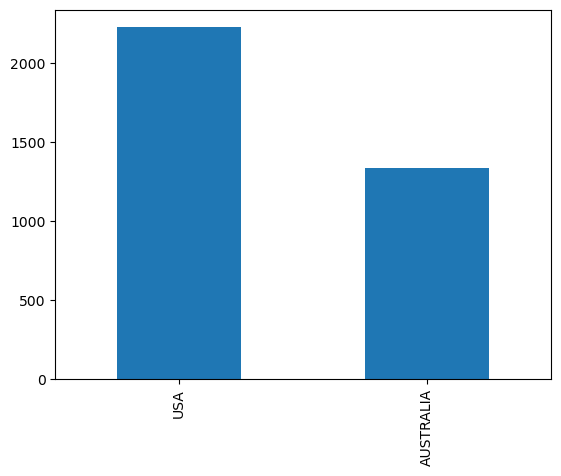

In [84]:
import matplotlib.pyplot as plt
SharkData_filtrado['Country'].value_counts().plot.bar();


#aquí tenemos la primera hipotesis: Es cierto que en EEUU hay más ataques que en AUS.

In [140]:
# FIRST HYPOTHESIS: There are more attacks in EEUU than AUS. TRUE!!!!

SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,NaN,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Diving,NaN,Y,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Pearl diving,NaN,Y,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,Swimming,NaN,Y,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,Y,NaN


# SEGUNDA HIPOTESIS

In [178]:
#replace de las cosas que queremos cambiar y/o eliminar para tener la columan de 'Age' más clean:

SharkData.replace({'Age' : { '2½' : '2' }})
SharkData.replace({'Age' : { ' 28' : '28' }})
SharkData.replace({'Age' : { ' 43' : '43' }})
SharkData.replace({'Age' : { '40s' : '40' }})

#una funcion para sacar la media en los valores donde hay &, or o to:
def media_dos_numeros (str_):
    try:
        if ("&") in str_:
            dos_numeros = str_.split("&")
            return (int(dos_numeros[0]) + int(dos_numeros[1])/2)
        elif "or" in str_:
            dos_numeros = str_.split("or")
            return (int(dos_numeros[0]) + int(dos_numeros[1])/2)
        elif "to" in str_:
            dos_numeros = str_.split("to")
            return (int(dos_numeros[0]) + int(dos_numeros[1])/2)
    except:
        return str_
    return str_




In [181]:
#introducimos la funcion en la columna age
SharkData['Age'] = SharkData['Age'].map(media_dos_numeros)

In [196]:
SharkData.Age.unique()


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58', '47', '61', '65',
       '36', '66', '43', '9', '72', '59', '6', '27', '64', '23', '71',
       '44', '62', '63', '70', '1', '53', '77', '74', 41.0, '5', '86',
       63.0, '28, 23 & 30', 49.0, '84', '\xa0 ', ' ', '21 & ?', '75',
       33.0, 22.5, ' 28', 47.0, '87', '67', 'Elderly', 29.0, 'adult',
       15.0, '? & 19', 36.0, '(adult)', 51.5, 39.0,
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', 46.0, 65.0, 34.5, 'X',
       '"middle-age"', 43.5, 'MAKE LINE GREEN', ' 43', '81', '"young"',
       '78', 25.0, 'F', 14.0, 'young', 47.5, '  ', 'A.M.', '?    &   14',
       '2½'], dtype=object)

In [214]:
#Seguimos eliminando valores que no nos interesan.
SharkData = SharkData[SharkData.Age != 'young']
SharkData = SharkData[SharkData.Age != 'MAKE LINE GREEN']
SharkData = SharkData[SharkData.Age != 'A.M.']
SharkData = SharkData[SharkData.Age != '?    &   14']
SharkData = SharkData[SharkData.Age != 'Elderly']
SharkData = SharkData[SharkData.Age != 'F']
SharkData = SharkData[SharkData.Age != '"middle-age"']
SharkData = SharkData[SharkData.Age != 'adult']
SharkData = SharkData[SharkData.Age != '\xa0 ']
SharkData = SharkData[SharkData.Age != '(adult)']
SharkData = SharkData[SharkData.Age != '28, 23 & 30']
SharkData = SharkData[SharkData.Age != '"young"']
SharkData = SharkData[SharkData.Age != '21 & ?']
SharkData = SharkData[SharkData.Age != '? & 19']
SharkData = SharkData[SharkData.Age != '? & 27']
SharkData = SharkData[SharkData.Age != '21, 34,24 & 35']
SharkData = SharkData[SharkData.Age != 'X']
SharkData = SharkData[SharkData.Age != 'middle-age']
SharkData = SharkData[SharkData.Age != ' ']



In [200]:
SharkData.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '68', '51', '39', '58', '47', '61', '65',
       '36', '66', '43', '9', '72', '59', '6', '27', '64', '23', '71',
       '44', '62', '63', '70', '1', '53', '77', '74', 41.0, '5', '86',
       63.0, 49.0, '84', '75', 33.0, 22.5, ' 28', 47.0, '87', '67', 29.0,
       15.0, 36.0, 51.5, 39.0, '37, 67, 35, 27,  ? & 27', 46.0, 65.0,
       34.5, 43.5, ' 43', '81', '78', 25.0, 14.0, 47.5, '  ', '2½'],
      dtype=object)

In [215]:
#algun replace más...
SharkData['Age'] = SharkData['Age'].replace(['40s', '2½', ' 28'], ['40', '2', '28'])


In [209]:
SharkData.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '1', '53', '77', '74', 41.0, '5', '86', 63.0,
       49.0, '84', '75', 33.0, 22.5, 47.0, '87', '67', 29.0, 15.0, 36.0,
       51.5, 39.0, 46.0, 65.0, 34.5, 43.5, ' 43', '81', '78', 25.0, 14.0,
       47.5, '2'], dtype=object)

In [210]:
#algun delete más
SharkData = SharkData[SharkData.Age != '  ']
SharkData = SharkData[SharkData.Age != '37, 67, 35, 27,  ? & 27']


In [211]:
SharkData.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '1', '53', '77', '74', 41.0, '5', '86', 63.0,
       49.0, '84', '75', 33.0, 22.5, 47.0, '87', '67', 29.0, 15.0, 36.0,
       51.5, 39.0, 46.0, 65.0, 34.5, 43.5, ' 43', '81', '78', 25.0, 14.0,
       47.5, '2'], dtype=object)

In [212]:
#vamos a quitar los Nan values de la columna 'Age'
SharkData = SharkData[SharkData['Age'].notna()]

In [216]:
#pasamos de floats a int toda la columna edad:
SharkData['Age'] = SharkData['Age'].astype(int)

In [217]:
SharkData.Age.unique()

array([57, 11, 48, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54, 41,
       37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 40, 28, 20, 24, 26, 49,
       22,  7, 31, 17, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58, 47,
       61, 65, 36, 66, 43,  9, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63, 70,
        1, 53, 77, 74,  5, 86, 84, 75, 87, 67, 81, 78,  2])

In [218]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,18,Y,Tiger shark
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Fishing,52,N,"Lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Swimming in section of river used for washing ...,16,N,Bull shark
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,"Shark fishing, knocked overboard",50,Y,NaN
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Swimming,14,Y,Bull shark
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,Standing,16,Y,12' tiger shark


In [223]:
import matplotlib.pyplot as plt

#añadimos una columna donde categorizamos si el caso es +18 o -18:
SharkData['Age Group'] = pd.cut(SharkData['Age'], bins=[0, 18, float('inf')], labels=['Under 18', 'Over 18'])

In [224]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species,Age Group
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark,Over 18
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN,Under 18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN,Over 18
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,18,Y,Tiger shark,Under 18
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Fishing,52,N,"Lemon shark, 3'",Over 18
...,...,...,...,...,...,...,...,...,...,...
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Swimming in section of river used for washing ...,16,N,Bull shark,Under 18
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,"Shark fishing, knocked overboard",50,Y,NaN,Over 18
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Swimming,14,Y,Bull shark,Under 18
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,Standing,16,Y,12' tiger shark,Under 18


In [285]:
SharkData.groupby("Age Group").agg("count")


,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species
Age Group,,,,,,,,,
Under 18,1079,1079,1079,1079,1078,1017,1079,1017,598
Over 18,2353,2353,2352,2352,2345,2280,2353,2191,1579


In [282]:
#Eliminamos valores que no nos interesan de la columna Fatal (Y/N)
SharkData = SharkData[SharkData['Fatal (Y/N)'] != 'M']
SharkData = SharkData[SharkData['Fatal (Y/N)'] != '2017']
SharkData = SharkData[SharkData['Fatal (Y/N)'] != 'UNKNOWN']
SharkData = SharkData[SharkData['Fatal (Y/N)'] != ' N']



In [283]:
import seaborn as sns

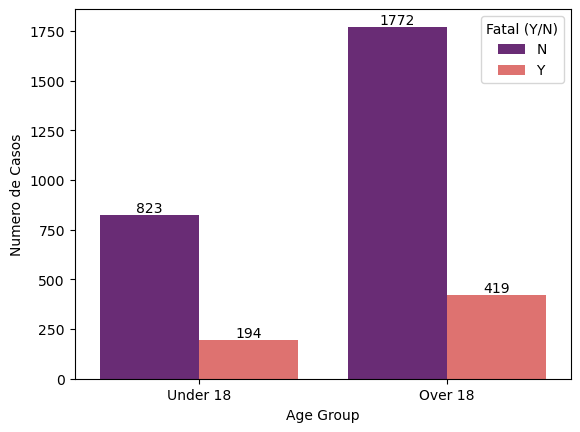

In [293]:
segunda_hipotesis = sns.countplot(x=SharkData['Age Group'],hue=SharkData["Fatal (Y/N)"], palette="magma")
plt.ylabel("Numero de Casos");

for container in segunda_hipotesis.containers:
    segunda_hipotesis.bar_label(container)

In [330]:
#Posible Hipotesis Before vs After Donald Trump

SharkData['Before_After_Trump'] = pd.cut(SharkData['Year'], bins=[0, 2017, float('inf')], labels=['Before Trump', 'After Trump'])

In [331]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species,Age Group,Before_After_Trump
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark,Over 18,After Trump
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN,Under 18,After Trump
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN,Over 18,After Trump
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,18,Y,Tiger shark,Under 18,After Trump
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Fishing,52,N,"Lemon shark, 3'",Over 18,After Trump
...,...,...,...,...,...,...,...,...,...,...,...
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Swimming,16,N,Bull shark,Under 18,NaN
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,"Shark Fishing, Knocked Overboard",50,Y,NaN,Over 18,NaN
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Swimming,14,Y,Bull shark,Under 18,NaN
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,Standing,16,Y,12' tiger shark,Under 18,NaN


In [332]:
SharkData.groupby("Before_After_Trump").agg("count")

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species,Age Group
Before_After_Trump,,,,,,,,,,
Before Trump,3379,3379,3379,3378,3370,3246,3379,3157,2138,3379
After Trump,39,39,39,39,39,38,39,38,30,39


# Tercera Hipotesis: Which is the age group with the highest percentage of fatal attacks in relation to number of cases

In [ ]:
SharkData.loc[SharkData['Age']<=19, 'age_group'] = 'teenage'
SharkData.loc[SharkData['Age'].between(20,24), 'age_group'] = 'young adult'
SharkData.loc[SharkData['Age'].between(25,39), 'age_group'] = 'adult'
SharkData.loc[SharkData['Age']>39, 'age_group'] = 'older_adult'


In [341]:
SharkData

,Case Number,Date,Year,Type,Country,Activity,Age,Fatal (Y/N),Species,Age Group,Before_After_Trump,age_group
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,57,N,White shark,Over 18,After Trump,older_adult
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,11,N,NaN,Under 18,After Trump,teenage
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,48,N,NaN,Over 18,After Trump,older_adult
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Swimming,18,Y,Tiger shark,Under 18,After Trump,teenage
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Fishing,52,N,"Lemon shark, 3'",Over 18,After Trump,older_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Swimming,16,N,Bull shark,Under 18,NaN,teenage
6254,ND.0051,Before 1957,0.0,Provoked,CUBA,"Shark Fishing, Knocked Overboard",50,Y,NaN,Over 18,NaN,older_adult
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Swimming,14,Y,Bull shark,Under 18,NaN,teenage
6276,ND.0026,Early 1930s,0.0,Unprovoked,BELIZE,Standing,16,Y,12' tiger shark,Under 18,NaN,teenage


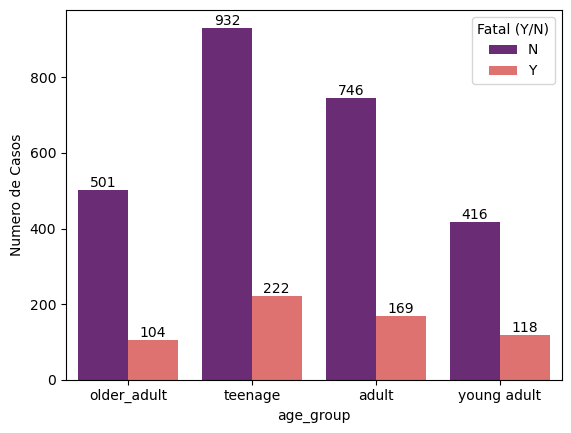

In [343]:
tercera_hipotesis = sns.countplot(x=SharkData['age_group'], hue=SharkData["Fatal (Y/N)"], palette="magma")
plt.ylabel("Numero de Casos");


for container in tercera_hipotesis.containers:
    tercera_hipotesis.bar_label(container)

In [350]:
quotient = 222 / 932
percent_teenager = quotient * 100

print(percent_teenager)



23.819742489270386


In [347]:
quotient = 118 / 416
young_adult = quotient * 100

print(young_adult)

28.365384615384613


In [348]:
quotient = 169 / 746
adult = quotient * 100

print(adult)

22.654155495978554


In [349]:
quotient = 104 / 501
old_adult = quotient * 100

print(old_adult)

20.758483033932134
